In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [2]:
data = pd.read_csv(r'moviesdataset_2023.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   100 non-null    int64 
 1   name         100 non-null    object
 2   rating       98 non-null     object
 3   votes        99 non-null     object
 4   runtime      99 non-null     object
 5   genre        100 non-null    object
 6   description  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [3]:
data.isna().sum()



Unnamed: 0     0
name           0
rating         2
votes          1
runtime        1
genre          0
description    0
dtype: int64

In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data.drop('description', axis=1, inplace=True)
data.columns


Index(['name', 'rating', 'votes', 'runtime', 'genre'], dtype='object')

In [5]:
df = data.copy()
df_genre = data.copy()

In [6]:
## RANKING ACCORDING TO VOTES
## Which length movies most liked by the audiences according to their rating?
## Rating vs Votes- Correlation
## TOP 10 HIGHEST RATED MOVIE
## SEPERATE GENRES INTO AN ARRAY
## TOP 10 GENRE
## TOP 10 MOVIE COMBINING VOTES AND RATINGS
## SEPERATE THE MOVIES ACCORDING TO RATING WITH 7- 10 being green , -6 being yellow and 0-3 being red something like a colourscale

In [7]:
df.dropna(inplace=True)
df.isna().sum()
df.shape

(97, 5)

In [8]:
df_filtered = df[~df['rating'].str.lower().isin(['none', 'none'])]
df_filtered = df[~df['votes'].str.lower().isin(['none', 'none'])]
df_filtered = df[~df['runtime'].str.lower().isin(['none', 'none'])]

df_filtered.shape

(96, 5)

In [9]:
df_filtered['votes'] = df_filtered['votes'].str.replace(',', '').astype(int)


C:\Users\HP\AppData\Local\Temp\ipykernel_6432\3221949460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['votes'] = df_filtered['votes'].str.replace(',', '').astype(int)


In [10]:
sort_df_by_votes = df_filtered.sort_values(by=['votes'], ascending=False);
sort_df_by_votes.head(10)

,name,rating,votes,runtime,genre
0,Oppenheimer,8.4,565499,180 min,"['Biography, Drama, History']"
58,Dream Scenario,7.1,431734,102 min,"['Comedy, Horror']"
31,Guardians of the Galaxy Vol. 3,7.9,355043,150 min,"['Action, Adventure, Comedy']"
20,Spider-Man: Across the Spider-Verse,8.6,319476,140 min,"['Animation, Action, Adventure']"
34,John Wick: Chapter 4,7.7,310425,169 min,"['Action, Crime, Thriller']"
79,Ant-Man and the Wasp: Quantumania,6.1,216286,124 min,"['Action, Adventure, Comedy']"
49,The Super Mario Bros. Movie,7,216003,92 min,"['Animation, Adventure, Comedy']"
61,Reptile,6.8,208003,134 min,"['Crime, Drama, Mystery']"
32,Mission: Impossible - Dead Reckoning Part One,7.8,205413,163 min,"['Action, Adventure, Thriller']"
84,The Flash,6.7,192879,144 min,"['Action, Adventure, Fantasy']"


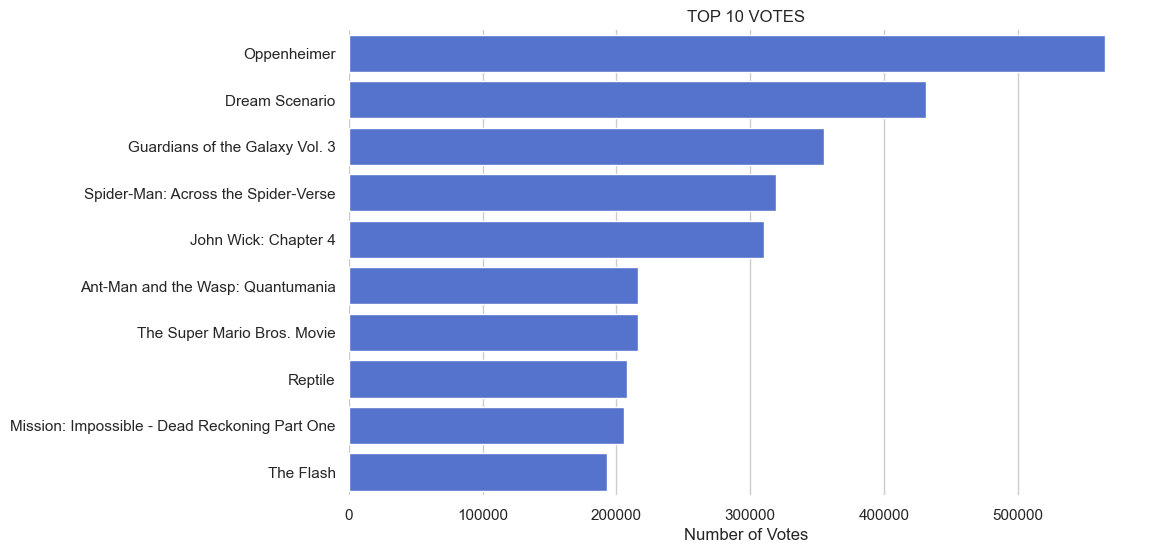

In [11]:
sns.set(style="whitegrid")
# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='votes', y='name', data=sort_df_by_votes[:10],color='royalblue')
plt.ylabel('')
plt.xlabel('Number of Votes')
plt.title('TOP 10 VOTES')
sns.despine(left=True, bottom=True)
plt.tight_layout(pad=2)


In [12]:
df_filtered['rating'] = df_filtered['rating'].str.replace(',', '').astype(float)

C:\Users\HP\AppData\Local\Temp\ipykernel_6432\1153251446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rating'] = df_filtered['rating'].str.replace(',', '').astype(float)


In [13]:

sort_by_rating = df_filtered.sort_values(by=['rating'], ascending=False);


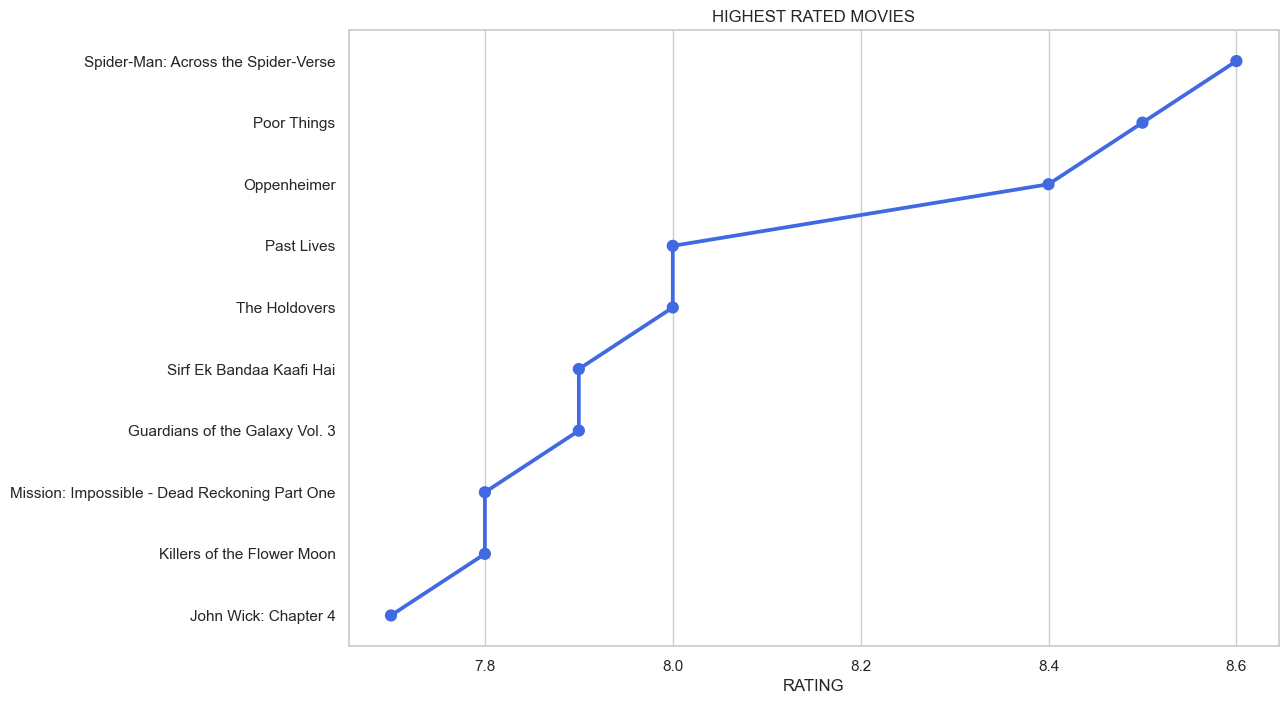

In [14]:
sns.set(style="whitegrid")
# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.pointplot(x='rating', y='name', data=sort_by_rating[:10], color='royalblue')
plt.ylabel('')
plt.xlabel('RATING')
plt.title('HIGHEST RATED MOVIES')
sns.set_style("darkgrid")

In [70]:
sort_df_by_time = df_filtered.sort_values(by=['runtime'], ascending=False);
sort_df_by_time.head(10)

,name,rating,votes,runtime,Genre,Action,Adventure,Biography,Comedy,Crime,...,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Horror,Sci-Fi
30,Killers of the Flower Moon,7.8,137343.0,206.0,"Crime, Drama, History",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25,Animal,6.9,54997.0,204.0,"Action, Crime, Drama",0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,Oppenheimer,8.4,565499.0,180.0,"Biography, Drama, History",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
34,John Wick: Chapter 4,7.7,310425.0,169.0,"Action, Crime, Thriller",0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,Mission: Impossible - Dead Reckoning Part One,7.8,205413.0,163.0,"Action, Adventure, Thriller",0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Napoleon,6.6,70597.0,158.0,"Action, Adventure, Biography",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18,The Hunger Games: The Ballad of Songbirds & Sn...,7.0,67853.0,157.0,"Action, Adventure, Drama",0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,Indiana Jones and the Dial of Destiny,6.6,167259.0,154.0,"Action, Adventure, Sci-Fi",0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31,Guardians of the Galaxy Vol. 3,7.9,355043.0,150.0,"Action, Adventure, Comedy",0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,Pathaan,5.9,152386.0,146.0,"Action, Adventure, Thriller",0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Killers of the Flower Moon'),
  Text(1, 0, 'Animal'),
  Text(2, 0, 'Oppenheimer'),
  Text(3, 0, 'John Wick: Chapter 4'),
  Text(4, 0, 'Mission: Impossible - Dead Reckoning Part One'),
  Text(5, 0, 'Napoleon'),
  Text(6, 0, 'The Hunger Games: The Ballad of Songbirds & Snakes'),
  Text(7, 0, 'Indiana Jones and the Dial of Destiny'),
  Text(8, 0, 'Guardians of the Galaxy Vol. 3'),
  Text(9, 0, 'Pathaan')])

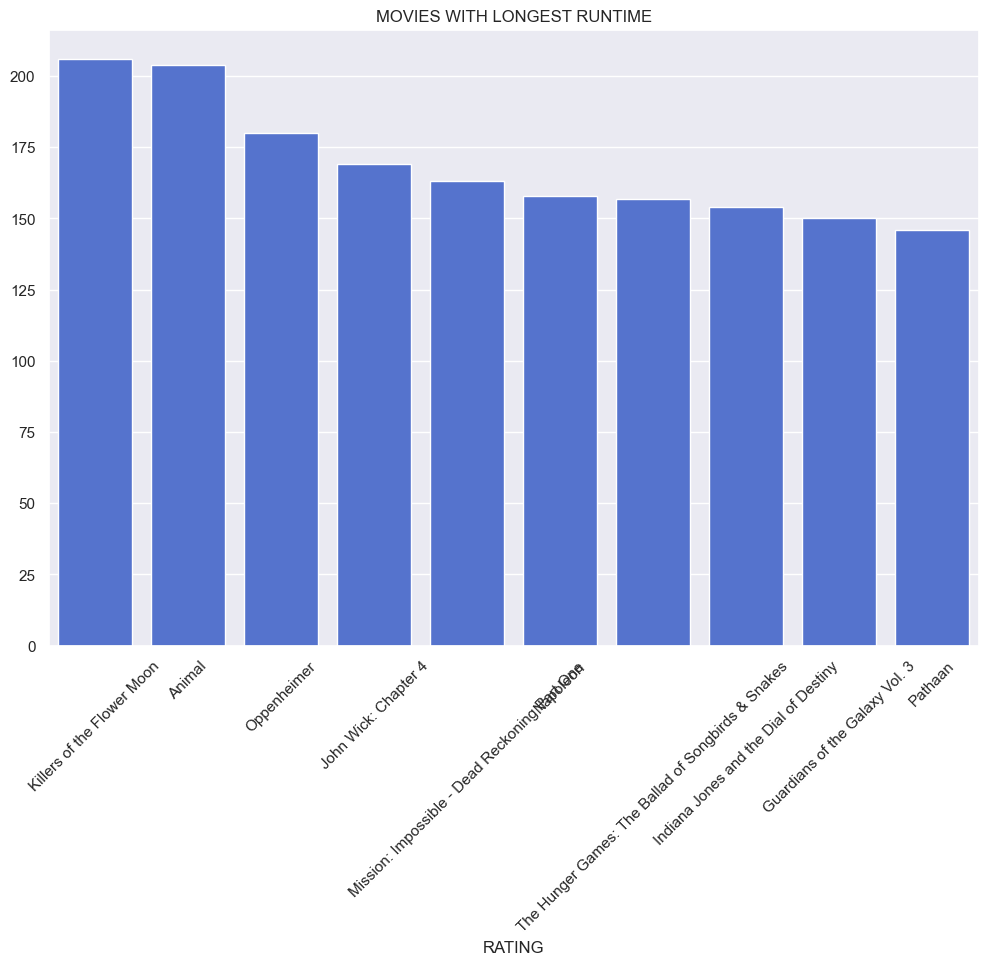

In [81]:
sns.set_style("darkgrid")
# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='runtime', data=sort_df_by_time[:10], color='royalblue')
plt.ylabel('')
plt.xlabel('RATING')
plt.title('MOVIES WITH LONGEST RUNTIME')
plt.xticks(rotation=45)


C:\Users\HP\AppData\Local\Temp\ipykernel_6432\4058921069.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='votes', y='rating', data=df_filtered, palette='rocket')


Text(0.5, 1.0, 'Relationship Between Rating and Votes for Movies')

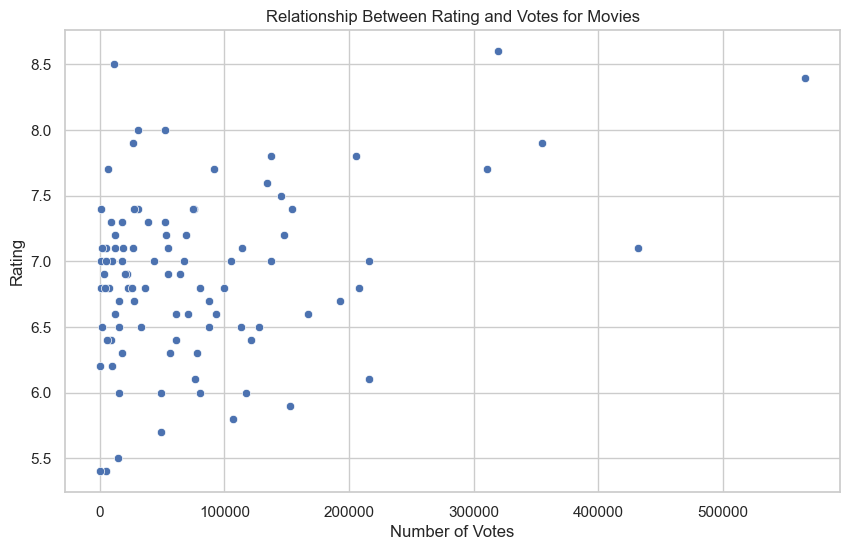

In [15]:
sns.set(style="whitegrid")

# Create a scatter plot to visualize the relationship between Rating and Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rating', data=df_filtered, palette='rocket')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Relationship Between Rating and Votes for Movies')

In [16]:
df_genre.columns

Index(['name', 'rating', 'votes', 'runtime', 'genre'], dtype='object')

In [17]:
df_genre_change = df_genre['genre'].str.replace('[', '').str.replace(']', '').str.replace("'", "").astype(str)





C:\Users\HP\AppData\Local\Temp\ipykernel_6432\2891509280.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_genre_change = df_genre['genre'].str.replace('[', '').str.replace(']', '').str.replace("'", "").astype(str)


In [18]:
df_filtered['Genre'] = df_genre_change
df_filtered


C:\Users\HP\AppData\Local\Temp\ipykernel_6432\842270123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Genre'] = df_genre_change


,name,rating,votes,runtime,genre,Genre
0,Oppenheimer,8.4,565499,180 min,"['Biography, Drama, History']","Biography, Drama, History"
1,Sound of Freedom,7.7,91802,131 min,"['Biography, Crime, Drama']","Biography, Crime, Drama"
2,Saltburn,7.3,38572,131 min,"['Comedy, Drama, Thriller']","Comedy, Drama, Thriller"
3,Tetris,7.4,75645,118 min,"['Biography, Drama, History']","Biography, Drama, History"
4,Jesus Revolution,7.1,12613,120 min,['Drama'],Drama
...,...,...,...,...,...,...
94,Teenage Mutant Ninja Turtles: Mutant Mayhem,7.2,53230,99 min,"['Animation, Action, Adventure']","Animation, Action, Adventure"
95,The Pope's Exorcist,6.1,76775,103 min,"['Horror, Thriller']","Horror, Thriller"
96,Creed III,6.7,87908,116 min,"['Drama, Sport']","Drama, Sport"
97,Kidnapped,7.1,1855,134 min,"['Drama, History']","Drama, History"


In [19]:
df_filtered.drop('genre', axis=1, inplace=True)
df_filtered


C:\Users\HP\AppData\Local\Temp\ipykernel_6432\1302183971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('genre', axis=1, inplace=True)


,name,rating,votes,runtime,Genre
0,Oppenheimer,8.4,565499,180 min,"Biography, Drama, History"
1,Sound of Freedom,7.7,91802,131 min,"Biography, Crime, Drama"
2,Saltburn,7.3,38572,131 min,"Comedy, Drama, Thriller"
3,Tetris,7.4,75645,118 min,"Biography, Drama, History"
4,Jesus Revolution,7.1,12613,120 min,Drama
...,...,...,...,...,...
94,Teenage Mutant Ninja Turtles: Mutant Mayhem,7.2,53230,99 min,"Animation, Action, Adventure"
95,The Pope's Exorcist,6.1,76775,103 min,"Horror, Thriller"
96,Creed III,6.7,87908,116 min,"Drama, Sport"
97,Kidnapped,7.1,1855,134 min,"Drama, History"


In [20]:
df_filtered['runtime'] = df_filtered['runtime'].str.replace('min', '').astype(int)

C:\Users\HP\AppData\Local\Temp\ipykernel_6432\1752286081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['runtime'] = df_filtered['runtime'].str.replace('min', '').astype(int)


In [21]:
df_filtered

,name,rating,votes,runtime,Genre
0,Oppenheimer,8.4,565499,180,"Biography, Drama, History"
1,Sound of Freedom,7.7,91802,131,"Biography, Crime, Drama"
2,Saltburn,7.3,38572,131,"Comedy, Drama, Thriller"
3,Tetris,7.4,75645,118,"Biography, Drama, History"
4,Jesus Revolution,7.1,12613,120,Drama
...,...,...,...,...,...
94,Teenage Mutant Ninja Turtles: Mutant Mayhem,7.2,53230,99,"Animation, Action, Adventure"
95,The Pope's Exorcist,6.1,76775,103,"Horror, Thriller"
96,Creed III,6.7,87908,116,"Drama, Sport"
97,Kidnapped,7.1,1855,134,"Drama, History"


In [22]:
df_filtered

,name,rating,votes,runtime,Genre
0,Oppenheimer,8.4,565499,180,"Biography, Drama, History"
1,Sound of Freedom,7.7,91802,131,"Biography, Crime, Drama"
2,Saltburn,7.3,38572,131,"Comedy, Drama, Thriller"
3,Tetris,7.4,75645,118,"Biography, Drama, History"
4,Jesus Revolution,7.1,12613,120,Drama
...,...,...,...,...,...
94,Teenage Mutant Ninja Turtles: Mutant Mayhem,7.2,53230,99,"Animation, Action, Adventure"
95,The Pope's Exorcist,6.1,76775,103,"Horror, Thriller"
96,Creed III,6.7,87908,116,"Drama, Sport"
97,Kidnapped,7.1,1855,134,"Drama, History"


In [42]:
genre = df_filtered['Genre']
genre =pd.DataFrame(genre)

In [43]:
genre

,Genre
0,"Biography, Drama, History"
1,"Biography, Crime, Drama"
2,"Comedy, Drama, Thriller"
3,"Biography, Drama, History"
4,Drama
...,...
94,"Animation, Action, Adventure"
95,"Horror, Thriller"
96,"Drama, Sport"
97,"Drama, History"


In [44]:
csv_genre = genre.to_csv()

In [45]:
csv_genre

',Genre\r\n0,"Biography, Drama, History"\r\n1,"Biography, Crime, Drama"\r\n2,"Comedy, Drama, Thriller"\r\n3,"Biography, Drama, History"\r\n4,Drama\r\n5,"Crime, Drama"\r\n6,"Action, Sci-Fi, Thriller"\r\n7,"Comedy, Music, Romance"\r\n8,"Biography, Comedy, Drama"\r\n9,"Drama, Sport"\r\n10,"Action, Drama, Thriller"\r\n11,"Comedy, History"\r\n12,"Drama, Romance"\r\n13,"Comedy, Romance"\r\n14,"Crime, Drama, Thriller"\r\n15,"Action, Drama, War"\r\n16,"Crime, Drama, Thriller"\r\n17,"Comedy, Drama"\r\n18,"Action, Adventure, Drama"\r\n19,Drama\r\n20,"Animation, Action, Adventure"\r\n21,"Action, War"\r\n22,"Biography, Drama, Sport"\r\n23,"Comedy, Drama, Sport"\r\n24,"Horror, Sci-Fi, Thriller"\r\n25,"Action, Crime, Drama"\r\n26,"Action, Adventure, History"\r\n27,"Crime, Drama"\r\n28,"Action, Adventure, History"\r\n29,"Biography, Comedy, Drama"\r\n30,"Crime, Drama, History"\r\n31,"Action, Adventure, Comedy"\r\n32,"Action, Adventure, Thriller"\r\n33,"Drama, Mystery, Thriller"\r\n34,"Action, Crime, T

In [47]:
from io import StringIO

In [50]:
genre_updated = pd.read_csv(StringIO(csv_genre))
genre_updated

,Unnamed: 0,Genre
0,0,"Biography, Drama, History"
1,1,"Biography, Crime, Drama"
2,2,"Comedy, Drama, Thriller"
3,3,"Biography, Drama, History"
4,4,Drama
...,...,...
91,94,"Animation, Action, Adventure"
92,95,"Horror, Thriller"
93,96,"Drama, Sport"
94,97,"Drama, History"


In [51]:
genre_updated['Genre'] = genre_updated['Genre'].str.split(',')
dummies= pd.get_dummies(genre_updated['Genre'].apply(pd.Series).stack()).sum(level=0)
dummies

C:\Users\HP\AppData\Local\Temp\ipykernel_6432\2943732683.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies= pd.get_dummies(genre_updated['Genre'].apply(pd.Series).stack()).sum(level=0)


,Action,Adventure,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Horror,Sci-Fi
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
93,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Calculate total viewership for each genre
genre_viewership = dummies.sum()

# Sort genres by viewership in descending order
sorted_genres = genre_viewership.sort_values(ascending=False)

# Select the top 10 most watched genres
top_10_genres = sorted_genres.head(10)

top_10_genres

In [ ]:
## TOP 10 GENRE 
## FILM VIWERSHIP DISTRIBUTION ACCORDING TO GENRE
## TOP 10 MOVIE COMBINING VOTES AND RATINGS


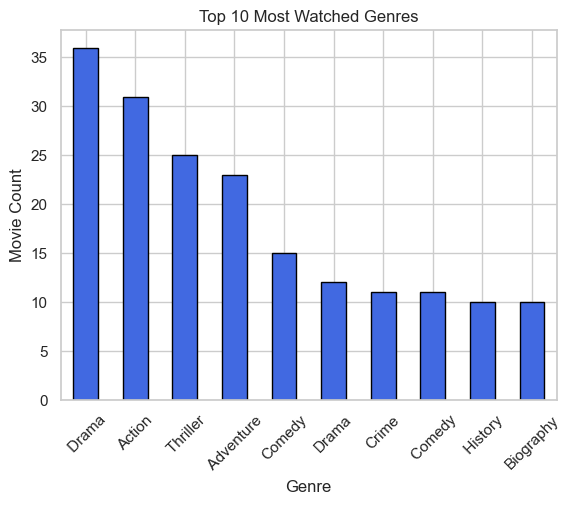

In [67]:
top_10_genres.plot.bar(rot=45, color='royalblue', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Movie Count')
plt.title('Top 10 Most Watched Genres')
plt.show()



In [ ]:
## AN HISTOGRAM OF THE 